In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('C:/Users/mauri/Documents/Important IH Files/data_4.05_activities/files_for_activities/lesson_4.05_data.csv')

In [3]:
X_num = df.select_dtypes(np.number)

In [4]:
X_cat = df.select_dtypes(np.object)

C:\Users\mauri\AppData\Local\Temp/ipykernel_24380/3215721315.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat = df.select_dtypes(np.object)


In [5]:
Y = X_num['AVGGIFT']
X_num.drop(["AVGGIFT"], axis =1, inplace = True)
Y

0         7.741935
1        15.666667
2         7.481481
3         6.812500
4         6.864865
           ...    
88388     3.375000
88389    25.000000
88390    20.000000
88391     8.285714
88392    96.794872
Name: AVGGIFT, Length: 88393, dtype: float64

In [6]:
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)
x_normalized

array([[3.71442104e-02, 2.38064146e-02, 9.99016415e-01, ...,
        3.10181298e-04, 2.86917700e-03, 3.10181298e-04],
       [1.49390167e-01, 2.97250369e-02, 9.88330156e-01, ...,
        4.91774507e-04, 1.42068191e-03, 5.46416119e-05],
       [4.28835731e-02, 2.16574987e-02, 9.98833486e-01, ...,
        1.03541826e-03, 3.24179100e-03, 3.45139421e-04],
       ...,
       [6.31124176e-02, 3.02969676e-02, 9.97544573e-01, ...,
        3.05145559e-04, 1.87946449e-03, 3.75892898e-05],
       [3.08532483e-02, 2.15808625e-02, 9.99284196e-01, ...,
        2.46169534e-04, 3.11814743e-03, 2.46169534e-04],
       [5.60618305e-02, 2.69551019e-02, 9.98055979e-01, ...,
        3.58604460e-04, 1.07581338e-03, 5.97674100e-05]])

In [7]:
encoder = OneHotEncoder().fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
encoded

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [8]:
X = np.concatenate((x_normalized,encoded), axis = 1)
X.shape

(88393, 24)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 100 )

In [10]:
lm = LinearRegression().fit(X_train,y_train)
predictions = lm.predict(X_test)

In [11]:
mse = mean_squared_error(predictions, y_test)

In [12]:
mse

40.64715271052966

In [13]:
def plot_knn(X,Y,m,k=[]):
    x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=10)
    scores_r2 = []
    scores_mse = []
    scores_mae = []
    
    if m == 'knn':
        for i in k:
            model = KNeighborsRegressor(n_neighbors=i)
            model.fit(x_train, y_train)
            predictions = model.predict(x_test)
            r2 = r2_score(y_test, predictions)
            mse = mean_squared_error(y_test, predictions)
            mae = mean_absolute_error(y_test, predictions)
            scores_r2.append(r2)
            scores_mse.append(mse)
            scores_mae.append(mae)
            
    elif m == 'lm':
            lm = LinearRegression().fit(x_train,y_train)
            predictions = lm.predict(x_test)
            r2 = r2_score(y_test, predictions)
            mse = mean_squared_error(y_test, predictions)
            mae = mean_absolute_error(y_test, predictions)
            scores_r2.append(r2)
            scores_mse.append(mse)
            scores_mae.append(mae)
            
    else:
        pass
        
    scores = [scores_r2, scores_mae, scores_mse]
    accuracies = ['R square', 'MAE', 'MSE']
    
    
    if m == 'knn':
        for i in range(3):
            plt.figure(figsize=(10,6))
            plt.plot(k,scores[i],color = 'blue',linestyle='dashed', 
                     marker='o',markerfacecolor='red', markersize=10)
    #         plt.title('accuracy score -', accuracies[i], 'vs. K Value')
            plt.xlabel('K')
            plt.ylabel(accuracies[i])
            plt.show()
    else:
        pass
    
    return    scores_r2, scores_mse, scores_mae
        
    

In [14]:
df = df.dropna()

In [15]:
data_sampled = df.sample(100)


In [16]:
data_sampled = data_sampled[['HV1', 'IC1', 'AVGGIFT']]

In [17]:
data_sampled.shape

(100, 3)

In [18]:
data_sampled_x = data_sampled.select_dtypes(np.number)
data_sampled_x

,HV1,IC1,AVGGIFT
86799,664,334,12.500000
936,420,171,21.666667
46965,742,345,8.700000
16016,275,230,12.000000
33345,824,356,7.333333
...,...,...,...
46939,927,286,15.000000
77352,901,327,6.176471
63376,349,176,6.166667
74914,425,226,20.000000


In [19]:
data_sampled_y = data_sampled['AVGGIFT']
data_sampled_x.drop(['AVGGIFT'], axis =1, inplace = True)

In [20]:
data_sampled_x

,HV1,IC1
86799,664,334
936,420,171
46965,742,345
16016,275,230
33345,824,356
...,...,...
46939,927,286
77352,901,327
63376,349,176
74914,425,226


In [23]:
data_sampled_x.shape

(100, 2)

In [24]:
data_sampled_y.shape

(100,)

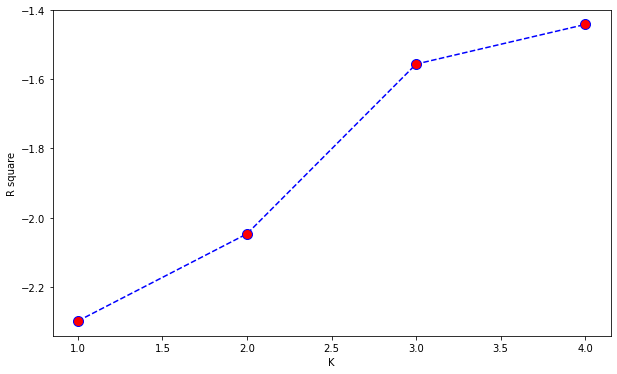

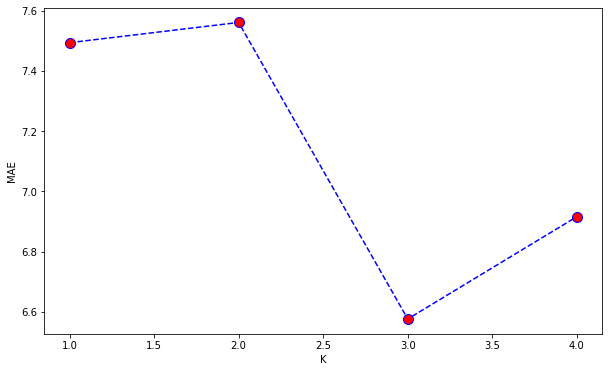

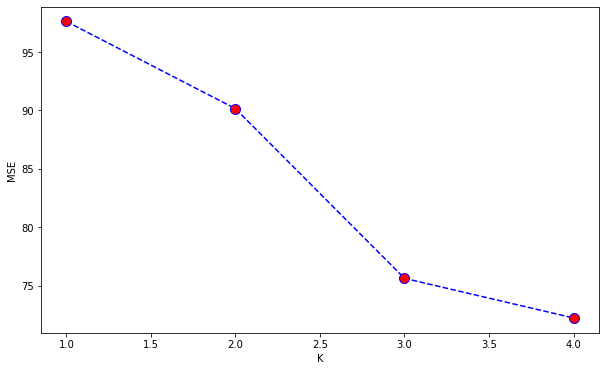

([-2.2992453822322947,
  -2.0469836772531935,
  -1.5558316455029084,
  -1.441173960863054],
 [97.61265323037748, 90.14914825313687, 75.61774867406174, 72.22544543065297],
 [7.49368679275, 7.560805140100001, 6.576058008366667, 6.915714534349999])

In [25]:
plot_knn(data_sampled_x, data_sampled_y, m = 'knn', k=[1,2,3,4])

In [ ]:
scores_r2